<img src="images/logo/selene-logo-640.png" style="max-height:75px;" alt="SELENE Logo" />

**Disclaimer:** This Jupyter Notebook contains content generated with the assistance of AI. While every effort has been made to review and validate the outputs, users should independently verify critical information before relying on it. The SELENE notebook repository is constantly evolving. We recommend to download or pull the latest version of this notebook from Github.

# Linear Regression

Linear Regression is a fundamental statistical and machine learning model used to understand and predict relationships between variables. At its core, Linear Regression models the relationship between an independent variable (or variables) and a dependent variable, assuming a linear relationship between them. This simple yet powerful technique helps us make sense of data by identifying patterns and trends, which can be crucial in fields as diverse as economics, biology, engineering, and social sciences. By finding the "line of best fit" through a set of data points, Linear Regression allows us to make predictions, providing insight into the dynamics of real-world phenomena.

The significance of Linear Regression lies not only in its simplicity but also in its interpretability. As one of the first algorithms introduced in machine learning courses, Linear Regression is accessible to learners new to data science and is often used as a building block for more advanced models. It allows us to quantify the relationship between variables and measure how changes in one can affect another. For instance, in predicting housing prices, Linear Regression can help model how factors like location, size, and age influence the price of a property. This ease of interpretation makes Linear Regression highly useful in fields where understanding the nature of relationships is as important as making accurate predictions.

Moreover, learning Linear Regression is essential because it introduces concepts that are foundational to more complex algorithms, such as regularization techniques, bias-variance tradeoff, and model evaluation metrics. These concepts play a crucial role across machine learning methods, making Linear Regression a natural entry point for these important ideas. While modern machine learning includes advanced techniques such as neural networks and ensemble methods, Linear Regression remains a valuable tool, especially when data is limited or when computational simplicity is desired.

In short, Linear Regression is a versatile and interpretable model that provides valuable insights into the relationships between variables. Its broad applications, from predicting economic trends to studying scientific data, make it one of the most widely used and foundational techniques in data analysis and machine learning.

### Setting up the Notebook

#### Make Required Imports

This notebook requires the import of different Python packages but also additional Python modules that are part of the repository. If a package is missing, use your preferred package manager (e.g., [conda](https://anaconda.org/anaconda/conda) or [pip](https://pypi.org/project/pip/)) to install it. If the code cell below runs with any errors, all required packages and modules have successfully been imported.

In [1]:
from src.utils.libimports.linreg import *
from src.utils.plotting.linreg import *
from src.utils.data.files import *

#### Download Required Data

Some code examples in this notebook use data that first need to be downloaded by running the code cell below. If this code cell throws any error, please check if the configuration file...

In [2]:
file_hdb_resale, data_folder = download_file("data/demos/linear-regression/hdb-resale-simplified.csv")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 480k/480k [00:00<00:00, 13.0MiB/s]


---

## Motivating Example

Let's assume you want to buy an apartment and are browsing listings on a property website. Each available listing for an apartment has a price. However, assuming you are not expert in the property market, it is not obvious if the listed price is actually a good price (i.e., a bargain) or a bad price (i.e., a rip-off). Of course, you know that apartments typically get more expensive if they are
* newer
* larger (size of living area)
* higher (in case of high-rise buildings)
* have more bedrooms / bathrooms
* closer to the city center
* etc.

but it is not really (i.e., quantitatively) clear how those features of an apartment affect its price. For example, is an apartment that has twice the living size of another apartment also twice as expensive on average? Is it more or less than twice as much? Also, just because it is a common assumption, does the distance to the city center really matter that much in reality? Having a good model to describe relationship between the features of apartments and their prices, allows us to address to core task:

* **Price Prediction:** If we have learned such a model, we can apply it to other apartments for which we do not have its true price to get (hopefully) a good estimate. This good be very useful information for an apartment owner to decide on meaningful asking price when putting the apartment up for sale. In contrast, a buyer can use the model to assess if the asking price for a apartment listing might be a good deal by checking if the asking price is below the predicted estimate or not

* **Feature Importance:** Apart from making good predictions, a good model also provides some insights into what the model has learned. One of the most common and useful insights is the importance of features. For example, the model might be able to tell us that the distance to the city center is in fact not an important predictor for the price of an apartment. Seller can use this information to highlight any features in a listing that are more likely to attract buyers, while buyers can assess how much money they can potentially save by focusing on relevant features (e.g., by moving from 3-bedroom to 2-bedroom apartments).

There are a wide range of such regression models the find such a function or mapping between features and a numerical target outcome. Linear Regression is a model using a linear equation to describe the relationship between, here, the features of apartments and their prices.


## Model Definition

Linear regression is a statistical model to estimate or describe the relationship between a dependent variable $y$ and one or more independent independent variables $x_1$, $x_2$, ..., $x_n$. The model is *linear* as this relationship between the $y$ and all $x_i$ is  described by the following linear equation:

$$\large
y_i = w_{0} + w_{1}x_{i1} + w_{2}x_{i2} + w_{3}x_{i3} + \dots + w_{d}x_{id} + e_{i}
$$

with $i = 1,..., n$, where

* $n$ is the number of observations (i.e., the number of records in our dataset)
* $y_i$ is the $i$-th response (e.g., the resale price of an apartment)
* $w_k$ is the $k$-th coefficient, with $w_0$ being the constant term in the model called *bias*, *offset*, or *intercept*
* $x_{ij}$ is the $j$-th predictor variable (e.g., the size of an apartment, or the floor height) of the $i$-th observation
* $e_i$ is the *noise term*, *disturbance term*, or *error variable* of the $i$-th observation

The noise terms $e_{i}$ are intrinsic to any real-world data and, of course, random. Therefore, when building a Linear Regression model (e.g., for predicting the $y$ for an new record that was not part of our training data) we have to make the important assumption that the noise terms, on average, cancel out. In mathematical terms we assume that the expectation value for the noise terms $E(e_i) = 0$. That means the the model will typically predict $y$ values (e.g., the price of an apartment) that is too high or too low compared to the true values for the records in the data, but across all training records, those errors cancel out. With this important assumption, we can use a Linear Regression model to calculate the $estimated$ or $predicted$ output $\hat{h}_{i}$ for the $i$-th data records as follows:

$$\large
\hat{y}_{i} = E(y_{i}) = w_{0} + w_{1}x_{i1} + w_{2}x_{i2} + w_{3}x_{i3} + \dots + w_{d}x_{id}
$$

In other words, the estimate or prediction of our model is the expected value for our $i$-th record given our assumption of $E(e_i) = 0$.

**Important:** The Linear Regression model requires multiple important underlying assumption. We will covers those in a separate notebook.

### Bias Trick

Before we address the task of finding the best weight values $w_0$, $w_1$, $w_2$, ..., $w_d$, let's first try to make the math a bit easier to work with. For example, we can write our initial equation as follows:

$$
\begin{align}
\large y_i &= \large w_{0} + w_{1}x_{i1} + w_{2}x_{i2} + w_{3}x_{i3} + \dots + w_{d}x_{id} + e_{i} \\[0.5em]
&= \large  w_{0} + \sum_{j=1}^{d} w_{j}x_{ij} + e_{i}
\end{align}
$$

Notice how weight $w_0$ kind of "sticks out" as it is not associated with any feature value. $w_0$ is called the **bias**, or the **intercept**, or the **offset**. The bias term is essential because it allows the model to accurately represent the relationship between input features and the target variable. Without a bias term, the regression line would be forced to pass through the origin, meaning that when all features are zero, the target prediction would also be zero. This assumption is often unrealistic, as the relationship between features and the target variable rarely aligns with the origin, especially in complex datasets. The bias term enables the model to shift vertically, giving it more flexibility to fit the data accurately. Of course, for our motivating example using apartment prices this might not be as relevant since an apartment where all feature values are 0 (e.g., incl its size) is not meaningful.

While the bias $w_0$ is in some sense a special weight, we would like to treat it as any other weight to make our notations even simple. We can accomplish this by introducing a new artificial features $x_{i0}$ for all data samples. To ensure that this new feature does not change the equations, we need to set all $x_{i0} = 1$. Thus, we can rewrite our equation:

$$
\begin{align}
\large y_i &= \large w_{0}x_{i0} + w_{1}x_{i1} + w_{2}x_{i2} + w_{3}x_{i3} + \dots + w_{d}x_{id} + e_{i} \\[0.5em]
&= \large  \sum_{j=0}^{d} w_{j}x_{ij} + e_{i}
\end{align}
$$

with $x_{i0} = 1$. Notice that the index $j$ of the sum now starts a zero as it also includes the bias term. If we treat all features $x_{i0}$, $x_{i1}$, $x_2$, ..., $x_{d}$ as a feature vector $\mathbf{x}_i$, and all corresponding weights $w_0$, $w_1$, $w_2$, ..., $w_d$ as a weight vector $w$, we can write the sum as the [dot product](https://en.wikipedia.org/wiki/Dot_product) between this feature vector $\mathbf{x}_{i}$ and the weight vector $\mathbf{w}$:


$$\large
y_i = \mathbf{w}^{T}\mathbf{x}_{i} + e_{i}
$$

with

$$\large
\mathbf{w} =
\begin{bmatrix}
    w_{0} \\
    w_{1} \\
    w_{2} \\
    \vdots \\
    w_{d}
\end{bmatrix}\ ,
\qquad
\mathbf{x}_{i} =
\begin{bmatrix}
    x_{i0} \\
    x_{i1} \\
    x_{i2} \\
    \vdots \\
    x_{id}
\end{bmatrix} =
\begin{bmatrix}
    1 \\
    x_{i1} \\
    x_{i2} \\
    \vdots \\
    x_{id}
\end{bmatrix}
$$

where $\mathbf{x}_{i}$ and $\mathbf{w}$ are vectors for $(d+1)$ elements, that is, $\mathbf{x}_{i} \in \mathbb{R}^{d+1}$ $\mathbf{w} \in \mathbb{R}^{d+1}$. Recall that $d$ is the number of original input features, but we also introduced the artificial feature $x_{i0}$ to accommodate the bias $w_0$.

### Matrix Notation

So far, we only considered the linear equation for Linear Regression with respect to a single data sample $i$. Of course, we want to find the best weight vector $\mathbf{w}$ with respect to *all* the data samples in our training dataset. This gives us the following set of linear equations:

$$
\begin{align}
\large y_1 &= \large \mathbf{w}^{T}\mathbf{x}_{1} + e_{1}\\[0.5em]
\large y_2 &= \large \mathbf{w}^{T}\mathbf{x}_{2} + e_{2}\\[0.5em]
\large y_3 &= \large \mathbf{w}^{T}\mathbf{x}_{3} + e_{3}\\[0.5em]
\vdots\\[0.5em]
\large y_n &= \large \mathbf{w}^{T}\mathbf{x}_{n} + e_{n}
\end{align}
$$

where $n$ is the number of training data samples. In this system of equations, all $y_i$ and $\mathbf{x}_i$ are constant as they come directly from training data. All errors $e_i$ are also constant, although we do not need their values &mdash; when training a Linear Regression model, we ignore the errors by relying on the assumption that $E(e_i) = 0$, as we will see later.

In short, we now have a system of linear equations where the number of equations is $n$ and the number of unknowns is $(d+1)$, that is, all weights $w_0$, $w_1$, $w_2$, ..., $w_d$ in the weight vector $\mathbf{w}$. This means that as long as we have more data samples than features (i.e., $n > d$ since this is the same as $n \geq d+1$), this system of linear equations has a unique solution (**important:** we also have to assume that the equations are linearly independent; we discuss what this means for using Linear Regression in practice later).

We can now write this system of linear equations using matrix notation to get the final equation to be solved to train or fit a Linear Regression model:

$$\large
\mathbf{y} = \mathbf{X}\mathbf{w} + \mathbf{e}
$$

with

$$\large
\mathbf{y} =
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    y_{3} \\
    \vdots \\
    y_{n}
\end{bmatrix}\ ,
\qquad
\mathbf{X} =
\begin{bmatrix}
    1 & x_{11} & x_{12} & \dots & x_{1d}\\
    1 & x_{21} & x_{22} & \dots & x_{2d} \\
    1 & x_{31} & x_{32} & \dots & x_{3d} \\
    \vdots & \vdots & \vdots & \ddots & \vdots\\
    1 & x_{n1} & x_{n2} & \dots & x_{nd}
\end{bmatrix}
\qquad
\mathbf{w} =
\begin{bmatrix}
    w_{0} \\
    w_{1} \\
    w_{2} \\
    \vdots \\
    w_{d}
\end{bmatrix}
\quad , \text{and}
\qquad
\mathbf{e} =
\begin{bmatrix}
    e_{1} \\
    e_{2} \\
    e_{3} \\
    \vdots \\
    e_{n}
\end{bmatrix}
$$

Training a Linear Regression model is finding the most suitable weight vector $\mathbf{w}$. This also means that a Linear Regression model can be completely described by $\mathbf{w}$ &mdash; this makes Linear Regression a parametric machine learning model.

Given that the estimate or prediction of our model is the expected value for our $i$-th record given our assumption of $E(e_i) = 0$, we can there formulate the equations for the predictions $\hat{\mathbf{y}}$ as follows:

$$\large
\hat{\mathbf{y}} = E(\mathbf{y}) = \mathbf{X}\mathbf{w}
$$


---

## Worked Example: Toy Dataset

Throughout this notebook, we will use a very simple dataset to illustrate the concept of Linear Regression. The scenario is a Crime Scene Investigation: Let's assume we are called to a crime and found the shoe print the suspect. However, the shoe print size is generally not a very useful information to look for suspects or ask the public for hints. Much more common is to publicize the height of a person. Now, arguably taller people have also taller feet and therefore wear larger shoes, and is not unreasonable to assume a linear relationship between a persons height and his or her shoe size. So how can we find a good estimate of the suspect's height given the shoe print we found?

Answering this questions can be modeled using Linear Regression. In some sense, it is the simplest setup since we have only a single independent variable (i.e., the shoe print size); the dependent variable is, of course, the height of the person. To actually model the relationship between the shoe print size and height, we now need a dataset $\mathbf{X} = \{(y_i, \mathbf{x}_i)\}^n_{i-1}$, with $n$ records containing the height $y_i$ and the shoe print size $x_i$ for a record $i$. Keep in mind that, in general, $\mathbf{x}_i = (x_{i1}, x_{i2}, ..., x_{id})$, that is, each record has $d$ features (i.e., independent variables). Since we only have a single feature here, we simply use $x_i$ to denote this feature (i.e., the shoe print size). This means that our equation for this scenario simplifies to:

$$\large
y_i = w_{0} + w_{1}x_{i} + e_{i}
$$

We can still use the matrix notation to have a single equation for all $n$ data samples:

$$\large
\mathbf{y} = \mathbf{X}\mathbf{w} + \mathbf{e}
$$

with

$$\large
\mathbf{y} =
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    y_{3} \\
    \vdots \\
    y_{n}
\end{bmatrix}\ ,
\qquad
\mathbf{X} =
\begin{bmatrix}
    1 & x_{1}\\
    1 & x_{2}\\
    1 & x_{3}\\
    \vdots & \vdots \\
    1 & x_{n}
\end{bmatrix}
\qquad
\mathbf{w} =
\begin{bmatrix}
    w_{0} \\
    w_{1} 
\end{bmatrix}\
\quad , \text{and}
\qquad
\mathbf{e} =
\begin{bmatrix}
    e_{1} \\
    e_{2} \\
    e_{3} \\
    \vdots \\
    e_{n}
\end{bmatrix}
$$

Of course, the data matrix $\mathbf{X}$ has only two columns, one for our single feature $x$ (shoe print size) and one for the constant feature for the bias. The vector $\mathbf{w}$ also reduces to only two elements, the bias $w_0$ and the weight or coefficient for feature $x$. Since we only have one feature here, we omit the second index. That means that $x_i$ represent the feature values for the $i$-th data sample.

In practice, we would create such a dataset $X$ by measuring the shoe print size $x$ and height $y$ for a random set of people. Since both shoe print sizes and heights of adults are unlike to vary that much, we probably would not not need to find too many people. We only need to ensure that out set contains people of varying height. However, for this notebook, we use a different approach: We *pretend* that we already know the relationship between $x$ and $y$. In other words, we know the *true* values $w_{0}$ and $w_{1}$, as well as the distribution of the random error variable $e$. More specifically, we assume:

* $w_{0} = 70$
* $w_{1} = 3.6$
* $e_{i} \sim \mathcal{N}(0, 5)$

The distribution of the random variable being a normal distribution with mean 0 and a fixed standard deviation $\sigma$ for all records reflects our important assumption of $E(e_i) = 0$.

So let's define these three import values for $w_{0}$, $w_{1}$, and $\sigma$:

In [3]:
w0_true = 70
w1_true = 3.6

w_true = np.asarray([w0_true, w1_true])

sigma = 5

**Important:** Again, keep in mind that in practice we are actually looking for the values for $w_{0}$ and $w_{1}$. Here we assume those values are given to us to generate a toy dataset. Note that these value are in line from a real-world dataset, so there not completely randomly chosen. However, feel free to play with those values to modify the generated toy dataset.

We first create a set of 20 random shoe print sizes measured in centimeters. The minimum size (27 cm) and maximum size (35) reflect a common range for the shoe print sizes of adults. In the code cell below, we use the function [`np.random.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to uniformly sample 20 shoe print sizes between 27 ans 35 centimeters. We also round each size to one decimal place.

In [4]:
# Set seed to ensure reproducible results
np.random.seed(1)

# Generate 20 shoe print sized between 27 and 35 centimeters
num_samples = 20
X_data = np.random.uniform(27, 35, num_samples).round(1)

# Create artificial feature x0 (all values 1) for bias w0
x0 = np.ones(X_data.shape[0])

# Add x0 to initial data matrix
X = np.vstack([x0, X_data]).T


# Print the array for the 20 random shoe print sizes
print(X_data)

[30.3 32.8 27.  29.4 28.2 27.7 28.5 29.8 30.2 31.3 30.4 32.5 28.6 34.
 27.2 32.4 30.3 31.5 28.1 28.6]


With the array of show print sizes as well as our values for $w_{0}$, $w_{1}$, and $\sigma$, we can now create a height value for each shoe print size. We do this by simple solving the equation:

$$\large
\mathbf{y} = \mathbf{X}\mathbf{w} + \mathbf{e}
$$

The code cell below accomplishes this. We use the method [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to randomly sample the error variables using a Normal Distribution with a mean $\mu=0$ and a variance of $\sigma = 5$. Again, we round all values down to a single decimal place.

In [5]:
# Set seed to ensure reproducible results
np.random.seed(2)

# Generate random errors
errors = np.random.normal(0, sigma, len(X))

# Calculate y based on the X and the known linear relationship + include the errors
y = (np.dot(X, w_true) + errors).round(1)

# Print the array for the 20 computed heights based on the given linear relationship between x and y
print(y)

[177.  187.8 156.5 184.  162.6 165.5 175.1 171.1 173.4 178.1 182.2 198.5
 173.2 186.8 170.6 183.7 179.  189.3 167.4 173. ]


Now that we have both `X` and `y` &mdash; and given that our dataset has only on feature &mdash; we can also plot the dataset using a simple scatter plot using the code cell below. The x axis in the the plot reflects the shoe print sizes, and the y axis reflects the corresponding heights. Of course, for different values for $w_{0}$, $w_{1}$, and $\sigma$, but also for different random seeds, the dataset and therefore the plot will be different.

#### Save Data for Later Use

The code cells below stores the data of our CSI example use case as a `csv` file for later used in a different notebook. We use the `pandas` package to make things easier for us.

In [6]:
# Combine the feature and output array into a single data matrix
data = [ (X_data[i], y[i]) for i, y_i in enumerate(y) ]

# Convert data matrix into a pandas DataFrame (not needed but simplifies the saving)
df = pd.DataFrame(data, columns=['shoe print size', 'height'])

# We can also have a quick look into the DataFrame to check of the data looks alright
df.head()

,shoe print size,height
0,30.3,177.0
1,32.8,187.8
2,27.0,156.5
3,29.4,184.0
4,28.2,162.6


A `DataFrame` comes with different auxiliary methods to save the content into file. One of those methods is `to_csv()` which, as the name suggests, stores a `DataFrame` as a `csv` file.

In [7]:
df.to_csv(f"{data_folder}csi-example-data.csv", index=None)

### Data Visualization

Since out CSI example dataset has only a single feature, we can easily visualize the data distribution using a scatter plot. This this end, we provide the `plot_csi_data()`; you can have a look into the file `src/utils.py` to check out the code of the method, but that is not required.

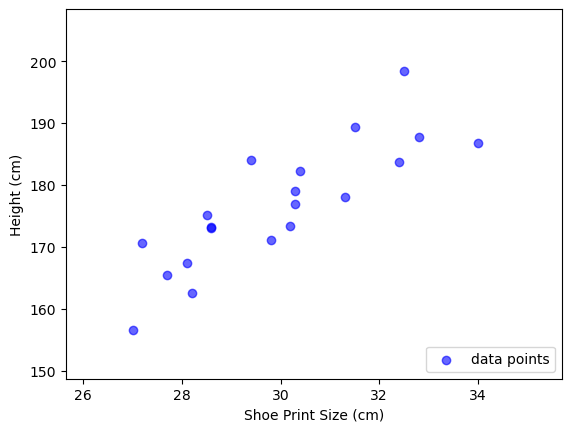

In [8]:
plot_csi_data(X_data, y)

A very important observation from the plot is that the relationship between the shoe print size and the height of a person is indeed roughly linear. This as an important assumption, and we will cover this in more detail in a [separate notebook](./Linear%20Regression%20(Assumptions).ipynb).

Now, recall from the defintions above that a Linear Regression model now tries to find a line that best fits the data (Of course, it will only be a line here since we have a single input feature. For two feature, the model will give us a plane, and for more features a hyperplane). Since we know the true values for $w_{0}$ and $w_{1}$, we can actually also include the regression line into the plot. Again, we can use the auxiliary method `plot_csi_data()` for this:

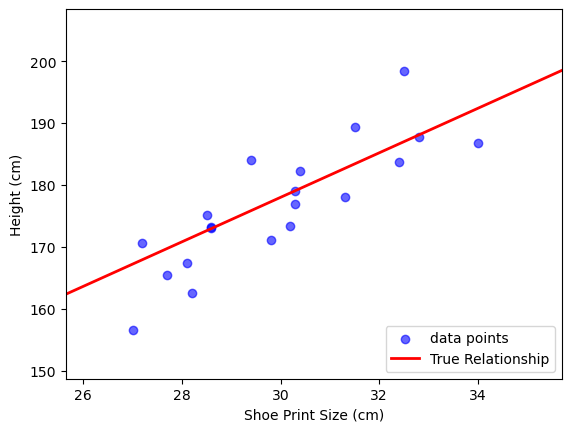

In [9]:
plot_csi_data(X_data, y, regression_lines=[(w_true, "red", "True Relationship")])

Not surprisingly, the line representing the true relationship between the input feature (shoe print size) and target output (height) reflects the overall trend of the data distribution.

Recall that all the predictions $\hat{y}_i$ of a Linear Regression model will lie on that regression line (or plane, or hyperplane). Since the height values blue data points reflect out true output values $y_i$ from our dataset, we can now also plot the errors $e_i$ that out model makes for each sample in the dataset. Each error $e_i$ for a data sample $\mathbf{x}_i$ is the difference between the true value $y_i$ and the predicted value $\hat{y}_i$. Let's again visualize this by plotting the data samples, the regression line, as well as all the errors represented by dashed black lines:

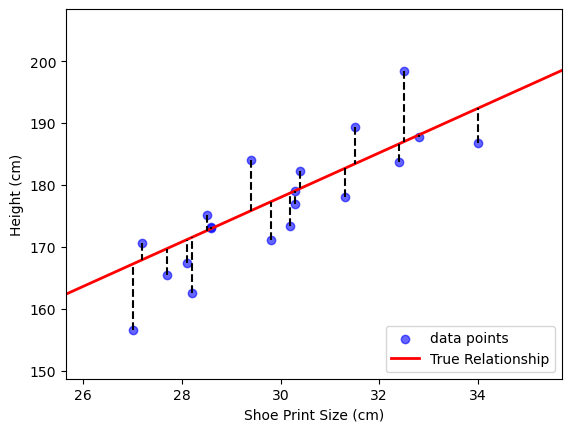

In [10]:
plot_csi_data(X_data, y, regression_lines=[(w_true, "red", "True Relationship")], show_errors=True)

Just by looking at this plot it seems intuitive that the best regression line &mdash; that is, the line that best fits the overall data distribution &mdash; is the line the minimizes the errors between the predicted and true values. And we can also see that, in practice, the average error will never be $0$, as this would require that all data sample lie indeed exactly on the regression line. Like for our CSI example data, this is arbitrarily likely to ever happen when working with real-world data.

However, we are no ready to train or fit a Linear Regression model.

---

## Training a Linear Regression Model

Recall that, given a feature matrix $\mathbf{X}$, the equation for our predictions or estimates $\hat{\mathbf{y}}$ is:

$$\large
\mathbf{\hat{y}} = \mathbf{X}\mathbf{w}
$$

It is obvious from the formula that the quality of the predictions depend the choice of weight vector $\mathbf{w}$. Finding the best choice of $\mathbf{w}$ for a given dataset refers to the task of training a Linear Regression model and requires to main components:

* a loss function to quantify how good or bad a current choice of $\mathbf{w}$ is, and

* a systematic way the finds $\mathbf{w}$ that minimizes the loss.

### Loss Function: How good are our weights $\mathbf{w}$?

From from the definitions of a Linear Regression model, we know that each record in our training data gives us two values:

* $y_{i}$: the $true$ value of the dependent or output variable of the $i$-th record (e.g., the price of an apartment or the height of a person)

* $\hat{y}_{i}$: the $estimated$ or $predicted$ value of the dependent or target variable of the $i$-th record

Of course, ideally, we would like that our predictions equal the true values, i.e., $\hat{y}_i = y_i$. For our CSI example, this would mean that all measured heights would indeed lie on a line. However, real-world data will never be that perfect, where "perfect" here refers to no noise/error and 100% adherence to all underlying assumptions (again, check out the separate notebook focusing on those assumptions). This means that we are looking for weights $\mathbf{w}$ that yield predictions $\hat{y}_{i}$ close to the true values $y_{i}$. Since we want to find those best weights algorithmically, we need a way to quantify the difference between the predicted and the true values with respect to a current set of weights $\mathbf{w}$. We do this in terms of a **loss function L** (also called *error function* or *loss function*)


$$\large
L(\hat{\mathbf{y}}, \mathbf{y}) = \text{"single value reflecting the difference between estimates/predictions and true values"}
$$

With $\hat{y}_{i}$ and $y_{i}$ being simple numerical values, quantifying the  difference between those two values is straightforward. The most common approach is the **Mean Squared Error (MSE) Loss**, defined as follows:

$$\large
L_{MSE}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{n}\sum_i^n (\hat{y}_i - y_i)^2 = \frac{1}{n}\sum_i^n e_{i}^{2}
$$

In plain words, the MSE loss is the average over all squared error terms $e_{i}$ for all $n$ records in the training data. By replacing $\hat{y}_{i}$ according to our formula, we get:

$$\large
L_{MSE}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{n}\sum_i^n \left[ (w_{0} + w_{1}x_{i1} + w_{2}x_{i2} + w_{3}x_{i3} + \dots + w_{d}x_{id}) - y_{i}\right]^2
$$


Again, we can also write the MSE loss using matrix notation as follows:

$$\large
L_{MSE}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{n} \lVert \mathbf{X}\mathbf{w} - \mathbf{y} \rVert_{2}^{2}
$$

where $\lVert \cdot \rVert_{2}$ is the Euclidean norm with $\lVert x \rVert_{2} = \sqrt{x_{1}^{2} + x_{2}^{2} + \dots + x_{p}^{2}}$ for a vector $x = (x_{1}, x_{2}, \dots, x_{p})$

The code cell below shows a simple implementation of the MSE loss function using `numpy`:

In [11]:
def calculate_mse(X, y, w):
    # Calculate weighted sum of data and weight vector using the dot product
    y_hat = np.dot(X, w)
    # Calculate and the MSE using NumpPy methods to implement MSE formula
    return np.sum(np.square(y - y_hat)) / len(X)

Since we know the true linear relationship described by `w_true`, we can use the method above to calculate the MSE loss for `w_true`:

In [12]:
mse_true = calculate_mse(X, y, w_true)

print("The mse loss w.r.t. w0={:.1f}, w1={:.1f} is {:.2f})".format(w0_true, w1_true, mse_true))

The mse loss w.r.t. w0=70.0, w1=3.6 is 30.63)


We can also calculate the MSE loss for other choices of $\mathbf{w}$ &mdash; feel free to change the values for `w0_random` and `w1_random` below and see how it effects the MSE loss. 

In [13]:
# Picks some random weights (feel free to change those)
w0_random, w1_random = -20, 4.2

mse_random = calculate_mse(X, y, [w0_random, w1_random])

print("The mse loss w.r.t. w0={:.1f}, w1={:.1f} is {:.2f})".format(w0_random, w1_random, mse_random))

The mse loss w.r.t. w0=-20.0, w1=4.2 is 5067.81)


For most chosen values, you should see a significant increase in the MSE loss, which naturally indicates worse choices $\mathbf{w}$. However, there are some values `w0_random` and `w1_random` that will yield a lower MSE loss than shown in the previous code cell. Probably unsurprisingly, those values will be quite similar to `w0_true` and `w1_true`. Still, you may be wondering why we can achieve a lower loss compared to using $\textbf{w}$ that describes the true linear relationship between input and the output. Think about before reading on; we will come back to this later.

### Minimizing the Loss

With the MSE loss function in place, we can now train or fit a Linear Regression model for a given training dataset. Training or fitting a parametric model such as Linear Regression means to find the best model parameters &mdash; in case of Linear Regression and many other models called the set of weights &mdash; that minimize the loss function. The MSE loss function for Linear Regression models is a very simple function on the sense that there exists very straightforward way to find the best values for the model weights $\mathbf{w}$. However, we will loo at three different approaches.

#### "Silly" Approach: Random Search

The MSE loss function tells us, how good or bad a current choice for the set of weights $\mathbf{}$ is. This include that, if we are having to sets of weights $\mathbf{w}$ and $\mathbf{w}^\prime$, we can determine which set yields a lower loss and is therefore the better choice. We can build on this basic observation by testing a large range of different set of weights and keep track which set yield the lowest loss. 

The code cell below accomplishes this but testing 1,000 different and (kind of) random choices for $w_0$ and $w_1$ for our CSI dataset. In each iteration, we randomly sample a value for $w_0$ and $w_1$ and calculate the MSE loss using our previously defined function `calculate_mse()`. If the loss for current set of weights is lower than the lowest loss so far, we update the variables `w0_random_best`, `w1_random_best`, and `mse_random_best` to keep track of the best set of weights (and the corresponding loss). Of course, after the 1,000 iterations, the variables `w0_random_best` and `w1_random_best` will contain the values for the best weights across all iterations.

**Your turn:** Try different values for `num_iterations` (e.g.: 10; 100; 10,000) and see how the result changes. In general, the lower the number of iterations the less likely we will sample a (very) good set weights resulting in an suboptimal loss. In contrast, when increasing the number of iterations, you should observe that the loss will start to converge to the true minimum.

In [14]:
# Set seed to ensure reproducible results
np.random.seed(0)

num_iterations = 1000

# Keep track of all data points for a plot
xs, ys, zs = [], [], []

# Initialize parameters
w0_random_best, w1_random_best, mse_random_best = None, None, float("inf")

for i in range(num_iterations):
    # Select a random value for weights w
    w0_random = np.random.uniform(0.0, 100.0, 1)[0]
    w1_random = np.random.uniform(0.0, 6.0, 1)[0]
    w_random = np.asarray([w0_random, w1_random])
    # Calculate loss for selected weights w
    mse_random = calculate_mse(X, y, w_random)
    # If the loss is lower than the currently best loss, remember all parameters
    if mse_random < mse_random_best:
        mse_random_best = mse_random
        w0_random_best = w0_random
        w1_random_best = w1_random
    # Remember current parameter values and loss for plotting
    xs.append(w0_random)
    ys.append(w1_random)
    zs.append(mse_random)
        
print("The best random values are: w0={:.3f}, w1={:.3f} (MSE loss={:.3f})".format(w0_random_best, w1_random_best, mse_random_best))

The best random values are: w0=53.618, w1=4.088 (MSE loss=28.553)


Notice that in the code cell above we kept track of all the set of random weights together with their losses. We can therefore plot the result to visualize how the loss depends on the choice of $w_0$ and $w_1$. We provide you with the method `plot_random_losses()` for that. Just execute the code cell below to see the plot (note: the visualization works arguably best for 1,000 iterations; but you can still plot the results for more or less iterations).

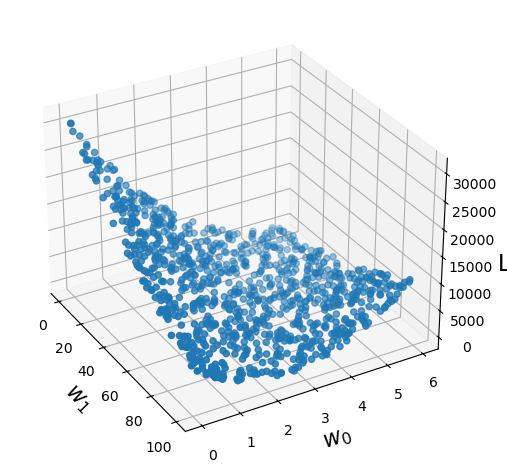

In [15]:
plot_random_losses(xs, ys, zs)

The plot clearly shows that some choices of $w_0$ and $w_1$ a objectively better as they result in a small(er) loss. What is maybe not as obvious from the plot is that there exists a *unique* choice of weights $w_0$ and $w_1$ the smallest possible loss. One thing you might have already noticed is that &mdash; at least for 1,000 iterations or more &mdash; the final loss is in fact smaller than the loss we got when using the $w_0$ and $w_1$ representing the true relationship between the input features and the output values. Again, think about why this is before we discuss it later.

**Discussion.** In principle, random search provides a way to find the best values for $\mathbf{w}$. But it is easy to see that this is not a scalable approach in practice for two main reasons:

* Our CSI example use case has only a single features (shoe print size). Thus, the set of $\mathbf{w}$ contains only two values $w_0$ and $w_1$. For a dataset with $d$ features, we would need to find the optimal values for $(d+1)$ weights. The problem is that the search space grows exponentially with the number of features, making a random search prohibitively expensive.

* In the example code above performing random search, the choice of $w_0$ and $w_1$ are not truly random as they were sampled from predefined and rather ranges that were known to contain the best weight values. In practice, this information would not be available, and the sampling of the weights would need to be truly random, again vastly increasing the search space.

In short, random search is not a viable approach for training any parametric model, even such a simple model as Linear Regression and with only a (very) small number of features.

#### Analytical Approach: Normal Equation

While a random search to find the best values for $\mathbf{w}$ kind of works conceptually, it is very unsystematic and therefore not practical for real-world applications. In general, training or fitting a parametric model is treated as an optimization problem. For Linear Regression, as well as for many other machine learning models, this optimization refers to minimizing or maximizing some function. In case of a loss functions such as the MSE loss, we want to find the parameters &mdash; here: $\mathbf{w}$ &mdash; that minimize that function.

Just to give a quick recap, finding the minimum of a function is a well-defined task in calculus. To find the minimum of a multivariate function $f(w_0, w_1, w_2, \dots)$ using calculus, we typically to perform the following three steps:

* **(1) Find all 1st Partial Derivatives:** Compute the partial derivatives of $f$ with respect to each variable $w_i$. This means that for a function $f(w_0, w_1, w_2, \dots)$, we need to find
$$\large
\frac{\partial f}{\partial w_0}\text{, } \frac{\partial f}{\partial w_1}\text{, } \frac{\partial f}{\partial w_2}\text{, } \dots
$$

* **(2) Set the Partial Derivatives to Zero and solve for all parameters**: Setting all partial derivatives gives us the following systems of equations:
$$\large
\frac{\partial f}{\partial w_0}=0\text{, } \frac{\partial f}{\partial w_1}=0\text{, } \frac{\partial f}{\partial w_2}\text=0{, } \dots
$$
Assuming we have our $(d+1)$ parameters $w_i$ of our Linear Regression Model, this system contains $(d+1)$ equations that are all set to $0$. All solutions &mdash; that is, all combinations of values for $w_i$ that result in all partial derivatives to be zero &mdash; indicate an extreme value (minimum, maximum, or saddle point) of function $f$.

* **(3) Use the Second Partial Derivative Test:** Step (2) only tells if we have found an extreme value. This means we still need to determine if we indeed found a minimum (and not a maximum or saddle point). This is done by calculating the 2nd partial derivatives of function $f$ and check if their values at the point of the extreme value is positive, negative, or zero. However, in the context of training parametric models such as Linear Regression, this last check is generally not required since we "know" that our extreme value must be a minimum. Think about why this is first, before we provide the answer at the end of the notebook.

Following these series of steps, we first need to calculate the 1st derivatives of the MSE loss function $L_{MSE}$ with respect to all parameters $w_i$. Recall that we have different ways to write the MSE loss function, either as sum of errors of all data samples or using matrix notation:

$$\large
L_{MSE}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{n}\sum_i^n (\hat{y}_i - y_i)^2 = \frac{1}{n} \lVert \mathbf{X}\mathbf{w} - \mathbf{y} \rVert_{2}^{2}
$$

Similarly, we can first compute the 1st partial derivate of $L_{MSE}$ with respect to any parameter $w_j$. If you are interested in the math behind it, to go through all steps in details in a separate notebook. Here we directly provide this solution for the 1st derivative:

$$
\begin{align}
\large \frac{\partial L_{MSE}}{\partial w_j} &= \large  \frac{2}{n} \sum_{i=1}^n x_{ij} \left( y_{i} - \mathbf{w}^T\mathbf{x}_{i} \right)
\end{align}
$$

We, again, can use the matrix notation to calculate the 1st derivative $L_{MSE}$ with respect to $\mathbf{w}$, i.e., with respect to *all* parameters $w_i$ using single formula:

$$ \large \frac{\partial L_{MSE}}{\partial \mathbf{w}} = \frac{2}{n}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\mathbf{w}) $$

With the first derivative in place, we can move to Step (2) which requires as to set the 1st partial derivative to $0$ and solve for $\mathbf{}$. In other words we have the equation

$$
\large
\frac{2}{n} \sum_{i=1}^n x_{ik} \left( y_{i} - \mathbf{w}^T\mathbf{x}_{i} \right) = \mathbf{0}
$$

where $\mathbf{0}$ is the zero vector (i.e., a vector with all elements being $0$), and then solve for $\mathbf{w}$. Again, we cover the involved math in full detail in the dedicated notebook. Solving for $\mathbf{w}$ gives us the following equation:

$$\large
\begin{align}
\large \mathbf{w} &= \large \left(\mathbf{X}^T\mathbf{X} \right)^{-1}\mathbf{X}^T\mathbf{y}\\[0.5em]
&= \mathbf{X}^{\dagger}\mathbf{y}
\end{align}
$$

with $\mathbf{X}^{\dagger} = \left(\mathbf{X}^T\mathbf{X} \right)^{-1}\mathbf{X}^T$ called the **pseudo inverse** of $\textbf{X}$. As a result, we now have a single equation that allows us to find the weights $\mathbf{w}$ that minimize our loss function $L_{MSE}$. Notice that the on the right-hand side of the equation that there are only variable that directly derive from our training dataset: the data matrix $\mathbf{X}$ containing the feature values for all data samples, and the vector $\mathbf{y}$ with all true output values.

Let's implement the Normal Equation in a Python method. With methods provided by `numpy` for easily calculating the the product of matrices and vectors, as well as calculating the inverse and transpose of matrices, this is a very simply task. The method `fit_analytically()` implements the Normal Equation step by step to make it easier the map the part of the formula of the Normal Equation to the line of code in the body of the method.

In [16]:
def fit_analytically(X, y):
    # Calculate the dot product between X and it's inverse
    XTX = np.dot(X.T, X)
    # Calculate the inverse of result of the dot product calculation
    inverse = np.linalg.inv(XTX)
    # Calculate the pseudo inverse
    pseudo_inverse = np.dot(inverse, X.T)
    # Calculate and return the final parameter values
    return np.dot(pseudo_inverse, y)

We can now use this function to calculate the best values for the weights $\mathbf{w}$ for our CSI dataset.

In [17]:
w_analytical_fit = fit_analytically(X, y)

print("The best are: w0={:.3f}, w1={:.3f}".format(w_analytical_fit[0], w_analytical_fit[1]))

The best are: w0=49.466, w1=4.251


Consequently, we can also calculate the loss using the best values, i.e., the smallest loss possible for this given dataset:

In [18]:
mse_analytical_fit = calculate_mse(X, y, w_analytical_fit)

print("The the smallest loss is: {:.3f}".format(mse_analytical_fit))

The the smallest loss is: 27.939


When comparing the results with true values for $w_0$ and $w_1$ you should notice two things

* The learned weights $\mathbf{w}$ do not match the true weights $w_0=70$ and $w_1=3.6$
* The loss for the learned weights $\mathbf{w}$ is actually lower that the loss for the true weights

We can also visually confirm this by plotting the CSI dataset with the true and the predicted regression line line so see the difference:

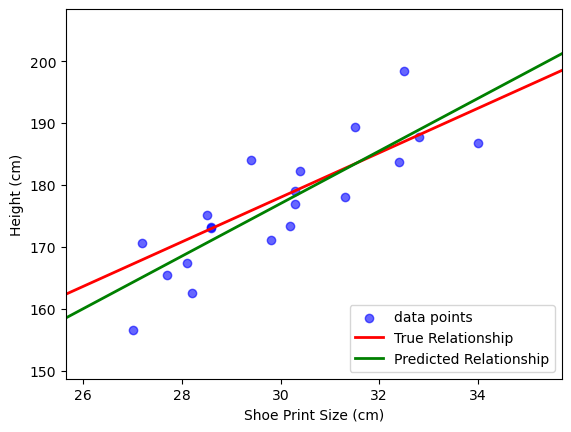

In [19]:
plot_csi_data(X_data, y, regression_lines=[(w_true, "red", "True Relationship"), (w_analytical_fit, "green", "Predicted Relationship")])

So what is going on? Recall that we created our CSI dataset with random noise, and we assume that the average error is zero, i.e., $E(e_i) = 0$. However, this will never be perfectly true with in the real-world. Even for our dataset which we explicitly created with zero-mean noise (e.g., $e_{i} \sim \mathcal{N}(0, 5)$ by default), it is arbitrary unlikely that the average error will be 0, particularly for only a small number of samples.

Let's actual calculate the average error. For this, only need to subtract the predicted values from the true values and compute the average/mean across all differences. We can do is in a single line of code:

In [20]:
y_theoretical = np.dot(X, w_true)

average_error = np.mean(y - y_theoretical)

print(f"Average error for {num_samples} samples: {average_error:.3f}")

Average error for 20 samples: -1.044


Ideally, this result should be zero to reflect our assumption of $E(e_i) = 0$. This result is an important reminder that a training dataset typically cannot capture all aspects of a real-world phenomenon fir various reasons:

* **Limited Sample Size:** Real-world data is vast and complex, while datasets used for training are often smaller subsets due to constraints in data collection, storage, and processing. As a result, training datasets can miss rare or unusual cases, edge cases, or certain patterns that only appear infrequently in the real world.

* **Selection Bias:** The process of selecting data for the dataset can inadvertently lead to biases. For example, if the data is collected from a specific location, time period, or demographic, it may not generalize well to other contexts. This bias limits the dataset's representation of the full diversity of the real-world phenomenon.

* **Dynamic Nature of Real-World Phenomena:** Many real-world processes are constantly changing (e.g., consumer behavior, weather patterns, language). A dataset collected at one point in time or in a specific context might not account for changes over time, making it challenging for models to generalize to new data.

* **Noise and Measurement Error:** Real-world data collection often involves noise and inaccuracies due to limitations in sensors, human error, or other external factors. Training datasets may have noisy data or incorrect labels, making it difficult to capture the true structure of the phenomenon accurately.

* **Complexity and High Dimensionality:** Many real-world phenomena involve a vast number of variables and complex relationships that are difficult to represent in a dataset fully. Some variables may be unknown, unmeasurable, or not included in the dataset, leading to an incomplete view of the underlying patterns.

For our CSI example dataset, the most relevant reasons are the limited data size as well as the noise and measurement errors.

**Try for yourself:** Change the number of generated samples for the toy dataset by modifying the variable `num_sample`. For example, increase the value of from 20 (default) to 200, and run all following code cells up to this point again. If you significantly increase the number of generated code cells, you should make the following observations:

* The learned weights and the true weights will be more similar
* The loss for the learned weights and the loss for the true weights will be more similar
* The lines showing the true relationship and the predicted relationship will be closer together
* The average error will be closer to 0

Alternative, you can keep the number of data samples the same but lower the variance. More specifically, decreasing the variance will show similar effects as increasing the number of data samples.

#### Numerical Method: Gradient Descent

Using the Normal Equation to find the best values for the weights $\mathbf{w}$ is naturally the preferred approach to train or fit a Linear Regression Model. In turns out, however, such an analytically approach is limited to very simple model such as Linear Regression. For more complex models with more complex loss functions, setting the 1st partial derivatives of the loss function and solving for $\mathbf{w}$ is not possible. For example, this is already try for Logistic Regression and the accompanying Cross-Entropy Loss.

In these cases, we need to rely on iterative optimization methods to find the best $\mathbf{w}$. One of the most general-propose optimization methods is Gradient Descent. If you are unfamiliar with Gradient Descent, we have a whole topic covering this method. In a nutshell, the gradient of a function $f$ for a given set of parameters &mdash; in our case $\mathbf{w}$ &mdash; is the vector pointing to the steepest ascent at this point of $f$. Mathematically, the gradient $\nabla_{\mathbf{w}}f$ of a function $f$ with respect to parameters $\mathbf{w} = \{w_0, w_1, w_2, \dots, w_d \}$ is defined as follows:

$$\large
\nabla_{\mathbf{w}}f = \begin{bmatrix}
     \frac{\partial f}{\partial w_0}\\
     \frac{\partial f}{\partial w_0}\\
     \frac{\partial f}{\partial w_0}\\
     \vdots \\
     \frac{\partial f}{\partial w_d}\\
\end{bmatrix}
$$

for a given set of values for $\{w_0, w_1, w_2, \dots, w_d \}$. Using the matrix notation this simplifies to

$$\large
\nabla_{\mathbf{w}}f = \frac{\partial f}{\partial \mathbf{w}}
$$

for a given set of values for $\mathbf{w}$. Since we already calculated the 1st partial derivatives for our MSE loss function $L_{MSE}$, we can there for calculate its gradient with:

$$\large
\nabla_{\mathbf{w}}L_{MSE} = \frac{2}{n}\mathbf{X}^T(\mathbf{X}\mathbf{w} - \mathbf{y})
$$

We can directly implement this formula for calculating the gradient using the following Python method `calculate_mse_gradient`:

In [21]:
def calculate_mse_gradient(X, y, w):
    # Calculate hypothesis (i.e., y_hat)
    h = np.dot(X, w)
    # Calculate and return the final gradient
    return 2 * np.dot(X.T, (h - y)) / y.shape[0]

Let's calculate the gradient for our CSI example dataset. As initial values for the parameters we set $w_0 = 10$ and $w_1 = 10$. Of course, you can try difference values to see how it changes the resulting gradient.

In [22]:
w0_init = 10
w1_init = 10

gradient_init = calculate_mse_gradient(X, y, [w0_init, w1_init])

print(f"Gradient for w0={w0_init}, w1={w1_init}: {gradient_init}")

Gradient for w0=10, w1=10: [ 265.32  7987.171]


So how can we use this gradient to change the values of $w_0$ and $w_1$ in such a way that to minimize the loss. Assuming the default values of $w_0 = 10$ and $w_1 = 10$, we can interpret the gradient

$$\large
\nabla_{\mathbf{w}}L_{MSE} = \begin{bmatrix}
     265.32\\
     7987.17
\end{bmatrix}
$$

as follows:

* Since the gradient $\nabla_{\mathbf{w}}L_{MSE}$ points into the direction of the steepest ascent and both $w_0$ and $w_1$, slightly increasing any of the two values will increase the loss. This means we have to decrease the current values of $w_0$ and $w_1$ to lower the loss

* Since the component of the gradient for $w_1$ is larger than the one for $w_0$, a change in $w_1$ will have a greater affect on the loss than the same change in $w_0$.

* The absolute values of the gradient do *not* directly tell us how by how much we should actually change $w_0$ and $w_1$. Knowing from our analytical solution that the best values are $w_0=49.5$ and $w_1=4.3$, it seems obvious that simply subtracting the two values of the gradient from the values of $w_0$ and $w_1$ would be way to much of a change.

The last issues brings to the introduction of the so-called **learning rate**. The learning rate is nothing but a some scaling factor we apply to the gradient to get the value by which we update all $w_i$. As we can already see from the example above, typical values for the learning rate are $0.01 \dots 0.00001$, but the most suitable values can vary widely in practice depending on the task, model, and dataset.

With our method for calculating the gradient, we can implement the method `fit_gradient_descent` to train or fit a Linear Regression model using Gradient Descent. Again, if something might not be clear here, you can learn all about Gradient Descent as a separate topic.

In [23]:
def fit_gradient_descent(X, y, lr=0.001, num_iter=1000, verbose=False):
    # Initialize w as vector with all elements being 0
    w = np.zeros(X.shape[1])

    for i in range(num_iter):
        # Calculate gradient w.r.t. w
        gradient = calculate_mse_gradient(X, y, w)
        # Update step: adjust weights w.r.t. gradient and learning rate
        w -= lr * gradient
        # Print loss every 10% of the iterations
        if verbose == True:
            if(i % (num_iter/10) == 0):
                print('Loss: {:.3f} \t {:.0f}%'.format(calculate_mse(X, y, w), (i / (num_iter/100))))
    # Print final loss
    print('Loss: {:.3f} \t 100%'.format(calculate_mse(X, y, w)))
    # Return final set of weights w
    return w

Let's run Gradient Descent for 100 iterations using this method

In [24]:
w_gradient_descent_fit = fit_gradient_descent(X, y, num_iter=100, verbose=True)

print("The best weights using Gradient Descent are are: w0={:.3f}, w1={:.3f}".format(w_gradient_descent_fit[0], w_gradient_descent_fit[1]))

Loss: 20185.579 	 0%
Loss: 284.539 	 10%
Loss: 41.149 	 20%
Loss: 38.171 	 30%
Loss: 38.133 	 40%
Loss: 38.131 	 50%
Loss: 38.129 	 60%
Loss: 38.127 	 70%
Loss: 38.125 	 80%
Loss: 38.124 	 90%
Loss: 38.122 	 100%
The best weights using Gradient Descent are are: w0=0.237, w1=5.888


With the initial values of $w_0 = w_1 = 0$ we see a very large loss. However, through updating the weights in each iteration, the loss goes down step by step. Notice that the loss decrease very quickly at the begging, but this slows down significantly in the later iterations. So while the algorithms keeps getting closer to the optimal values for $w_0$ and $w_1$, the rate of convergence becomes very slow. After 100 iterations, the values $w_0$ and $w_1$ as well as the loss are still fairly different from the optimal values we already know.

So let's try more iterations...

In [25]:
num_iters = [10, 100, 1000, 10000, 100000]

solutions = []

for num_iter in num_iters:
    print(f"Fitting model using {num_iter} iterations...")
    w = fit_gradient_descent(X, y, num_iter=num_iter)
    solutions.append((f"Gradient Descent ({num_iter} iterations)", w))
print("DONE")

solutions.append(("Optimal solution", w_analytical_fit))

Fitting model using 10 iterations...
Loss: 420.876 	 100%
Fitting model using 100 iterations...
Loss: 38.122 	 100%
Fitting model using 1000 iterations...
Loss: 37.969 	 100%
Fitting model using 10000 iterations...
Loss: 36.563 	 100%
Fitting model using 100000 iterations...
Loss: 29.842 	 100%
DONE


The results show that it takes 100,000 iterations to get a loss that is at least close to the minimum loss of $27.939$ from above. For visualization, we can show all corresponding regression line in the same plot.

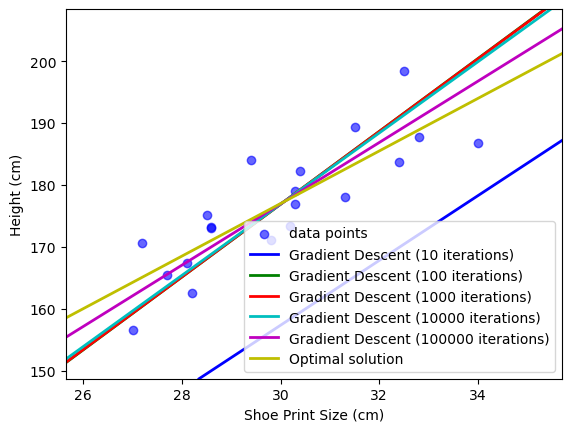

In [26]:
regression_lines = [ (w, None, label) for label, w in solutions ]

plot_csi_data(X_data, y, regression_lines=regression_lines)

As the plot clearly shows, the more iteration Gradient Descent is allowed to run, the closer it gets to the true/optimal solution. Notice, however, that even after 100,000 iterations, it still has not converged to the optimal solution. The reason is that near the optimal solution the loss is already very close the minimum. This means that the gradient at this pint the gradient is very small, and even more so after scaling it further down by multiplying it with the learning rate. In other words, after 100,000 iterations, the updates to the weights $w_i$ are almost negligible. 

To visualize this, we can plot the loss function for the same range of $w_0$ and $w_1$ ranges we used for the random search. The plotting of the loss function id implemented in the auxiliary method `plot_loss_function()` in the file `src/utils.py` &mdash; feel free to check it out. Since the loss does depend on the dataset described by $\mathbf{X}$ and $\mathbf{y}$, we also have to give this information to the methods. Run the code cell below to see the result.

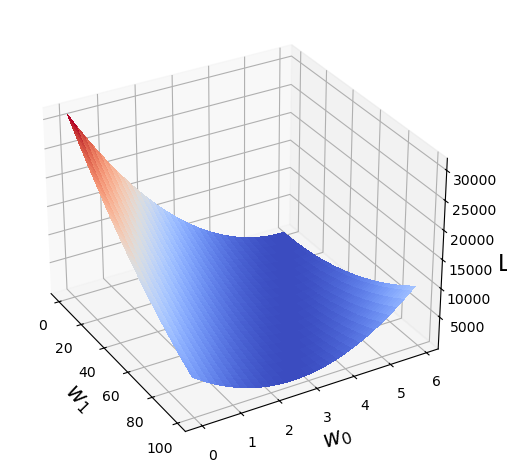

In [27]:
# Specify all possible combinations of w0 and w1 we want to consider
w0_range = np.arange(0.0, 100.0, 1)
w1_range = np.arange(0.0, 6.0, 0.1)

# Plot loss function
plot_loss_function(X, y, w0_range, w1_range, calculate_mse)

Of course, the overall shape of the curve reflects the shape of the data point we have seen in the plot for the random search. Only instead of having a fixed size of random choice of $\mathbf{w}$, we now have a continuous curve. Just by looking at the plot above, you might think that the blue are of the curve is flat. However, we already know from the math that the MSE loss function has a unique minimum. This means that the curve in the plot above has indeed one unique location where the loss is the smallest, it's just not distinguishable with the naked eye. However, this also means there are many other choices of $\mathbf{w}$ where the loss almost minimal. For these values of $\mathbf{w}$ the gradient and therefore the update to the $\mathbf{w}$ values will be very, very small.

However, you need to keep in mind that shape of the loss function depends on the dataset. As such, for other datasets the unique minimum might be more or less pronounced as for our CSI example dataset here. Also, we could only easily plot the curve of the loss function because our CSI data has only one input feature, and therefore the model has only two weights $w_0$ and $w_1$.

#### Making Prediction

Whatever method we use to minimize the MSE loss function $L_{MSE}$ the result is expected to be the set of $\mathbf{w}$ reflecting that minimum (or at least values near the minimum in case iterative methods). With those weights $\mathbf{w}$ we can now predict/estimate the height for a person for a given shoe print size. In case of a regression task, making a predicting simply comes down to calculating $\hat{y}_{new}$ for any unseen data sample $x_{new}$. Thus implementing the method `predict()` is trivial:

In [28]:
def predict(X, w):
    return np.dot(X, w)    

Notice that the method `predict()` accepts as input multiple unseen data samples and as such can return multiple predictions. So let's see what height our model would predict for the suspect that left a shoe print of size $32.2$:

In [29]:
# Create data matrix for our single unseen data sample for our suspect
X_suspect = [[1, 32.2]]

# Calculate predicted height
prediction_csi = predict(X_suspect, w_analytical_fit)[0]

print(f"The estimated height of the suspect is {prediction_csi:.1f}")

The estimated height of the suspect is 186.3


---

## Practical Applications

Linear Regression is simple enough that training such a model can easily be implemented from scratch, either analytically using the **Normal Equation** or using iterative methods such as **Gradient Descent**; as we have done above. In practice, however, we typically use implementations from popular data science and machine learning libraries. For one, using these implementations simplify the training by writing much less code. For another, existing implementations reduce to risk of coding error, and they often optimized to ensure a goo performance in terms of runtime.

In the following, we will use the [scikit-learn](https://scikit-learn.org/). Scikit-learn is a popular open-source machine learning library in Python, widely used for building and analyzing predictive data models. Built on top of foundational libraries like NumPy, SciPy, and matplotlib, it provides simple and efficient tools for data mining, data analysis, and machine learning tasks. Scikit-learn supports a wide range of supervised and unsupervised learning algorithms, including regression, classification, clustering, and dimensionality reduction. This library comes with its own implementation of [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), which we will use in the following examples.

### CSI Example Dataset

We first look again at our CSI example dataset, although we already found the best weights $\mathbf{w}$. However, let's assume we got this dataset as a `csv` file to train a Linear Regression model. As such, the first step is to load the data file. Particularly when working with `csv` files, the pandas library offers convenient ways to do this:

In [30]:
# Load data file into pandas DataFrame
df_csi = pd.read_csv(f"{data_folder}csi-example-data.csv")

# Show the first 5 entries of the DataFrame
df_csi.head()

,shoe print size,height
0,30.3,177.0
1,32.8,187.8
2,27.0,156.5
3,29.4,184.0
4,28.2,162.6


This DataFrame contains the complete dataset including the input feature (shoe print size) and the target outputs (height). We therefore need to extract our data matrix $\mathbf{X}$ and our label vector $\mathbf{y}$ from the DataFrame. The `to_numpy()` method in pandas is used to convert a pandas DataFrame or Series into a NumPy array. It provides a way to access the underlying data of these structures in a format that is compatible with NumPy, which is often required for numerical computations or integration with other libraries such as scikit-learn.

In [31]:
X_csi = df_csi[['shoe print size']].to_numpy()
y_csi = df_csi[['height']].to_numpy().squeeze()

We have now already everything in place to train a Linear Regression model; see the code cell above. In scikit-learn, the `fit()` method is a fundamental function used to train a machine learning model. It adjusts the model's parameters based on the provided training data and, for supervised learning algorithms, their corresponding target values. This method is used by all models (incl. [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) in scikit-learn and is critical for enabling the model to learn patterns from data.

In [32]:
model_csi = LinearRegression().fit(X_csi, y_csi)

Now that the model is trained (or fitted), we can also have a look at the learned weights $\mathbf{w}$. In the Linear Regression implementation of scikit-learn, these weights can be accessed as follows:

* The bias (or intercept, or offset) $w_0$ is stored in variable `intercept_`

* The other weights or coefficients $w_i$ for all features are stored in  the list variable `coef_`

So let's extract both $w_0$ and $w_1$ from the model. Since the CSI example dataset has only one input feature, the list variable `coef_` has only one entry.

In [33]:
w0_csi = model_csi.intercept_
w1_csi = model_csi.coef_[0]

print("The best are: w0={:.3f}, w1={:.3f}".format(w0_csi, w1_csi))

The best are: w0=49.466, w1=4.251


The weights match the results we already got when implementing the Normal Equation from scratch and using it for the CSI example dataset. This is, of course, unsurprising since the scikit-learn implementation of Linear Regression also implement the Normal Equation under its hood.

Finally, we can use this model to make predictions. Let's assume that the shoe print that we found at the crime size had size of 32.2 cm. The `predict()` method in scikit-learn is used to make predictions based on a trained machine learning model. After a model has been fitted to data using the `fit()` method, the `predict()` method takes new input data and returns the predicted output (e.g., class labels, regression values, or cluster assignments) based on the learned parameters.

The `predict()` methods expects are data matrix $\mathbf{X}$ the may contain multiple unseen data samples with multiple features. Although we only have one data sample with only one feature, we still need to represent this single value as a data matrix. Thus, instead of just using `32.2` as input for `predict()` method, we need to represent the input as matrix using `[[32.2]]`. The output of the `predict()` method is the list (or vector) of predicted values for all input data samples. Again, since we only have only one data sample, our final prediction is simply the first entry in this list.

In [34]:
height_suspect = model_csi.predict([[32.2]])[0]

print(f"The estimated height of the suspect is {height_suspect:.1f} cm")

The estimated height of the suspect is 186.3 cm


### Simple Apartment Price Prediction

We motivated to purpose of Linear Regression to build a model for predicting the resale prices of apartments. So let's end with this task in a simplified context. The Housing and Development Board (HDB) is Singapore's public housing authority. Established in 1960, it is responsible for planning, developing, and managing public housing in Singapore. HDB flats are home to more than 80% of the population, making them a key pillar of Singapore's housing policy. HDB flats can be sold in the resale market after a Minimum Occupation Period (MOP) of five years. The information about resale transaction that include the price as well as basic information for a sold flat is publicly available.

**Disclaimer:** To keep this example here very basic, the dataset used has been simplified. This includes that any non-numerical but potentially important features such as the location of flats (specified by their postal address) has been improved &mdash; in general, the publicly available data is lacking many other information that might affect the resale price of apartments. In short, the prediction results of our model won't be great.

Anyway, let's get started as usual by loading the data about the resale transactions from a `csv` file using the pandas library.

In [35]:
# Load data file into pandas DataFrame
df_hdb = pd.read_csv(file_hdb_resale)

print(f"The dataset contains {df_hdb.shape[0]} transactions")

# Show the first 5 entries of the DataFrame
df_hdb.head()

The dataset contains 20000 transactions


,month,num_rooms,storey,area_sqm,remaining_lease,price
0,6,5,14,123.0,74,930000.0
1,6,4,28,122.0,74,1090000.0
2,10,5,2,117.0,53,565888.0
3,5,3,5,68.0,56,368000.0
4,1,5,10,125.0,69,715000.0


We can see that the dataset has five input features describing each resale transaction:

* `month`: The month as a value from 1-12 in which the apartment was sold (note that the whole dataset covers only the transaction of a single year)
* `num_rooms`: The number of rooms as a value from 1-5
* `storey`: The storey on which the apartment in its building is located;
* `area_sqm`: The size of the apartment expressed by its area in square meter
* `remaining_lease`: The remaining lease of an HDB apartment refers to the number of years left on the 99-year leasehold of the flat. All HDB flats in Singapore are sold on a 99-year lease, starting from the date of completion or lease commencement.

Ignoring `month`, we would arguably expect that all features of an apartment are (more or less) positively correlated with its resale price. For example, the higher or the larger an apartment, the more likely the higher its price. We can calculate the correlation between all input features and price to actually confirm this. Such a correlation analysis is generally always strongly recommended. Recall, that Linear Regression assume that there indeed exists a linear relationship between the input features and the target output.

Using existing libraries, calculation the correlation between the features and price is very simply. The `corr()` method in the pandas library is used to calculate the pairwise correlation of columns in a DataFrame. It measures the linear relationship between numerical columns, returning a correlation matrix. Here, we ignore all pairwise correlations and focus on the correlation between `price` and all other columns.

In [36]:
corr = df_hdb.corr()[['price']]

print(corr)

                    price
month            0.038175
num_rooms        0.642531
storey           0.428576
area_sqm         0.619492
remaining_lease  0.448259
price            1.000000


Beyond just printing the correlations, the seaborn library also provides useful methods to visualize the result as a heatmap.

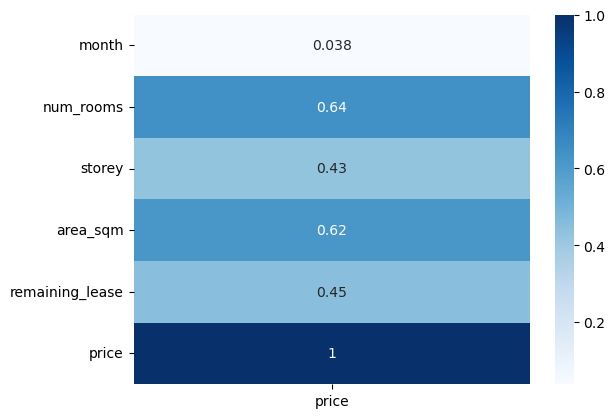

In [37]:
plt.figure()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

We can see that the results indeed match our initial expectations that most features show a (somewhat) positive correlation with price. Values between 0.3 and 0.5 are generally considered to describe low correlation, while values between 0.5 and 0.7 describe a moderate correlation. This is already an indicator that our Linear Regression model is unlikely to perform very well. Also as expected, `month` is kind of an outlier showing basically no correlation with `price`. This is not surprising since, at lease withing a single year, general economic trends as well as supply and demand in the housing market are likely to vary much. If anything, the slightly positive correlation value reflects the slight increase in the average resale price of HDB apartments over the year.

To prepare our dataset for training a Linear Regression model, we first have to extract the data matrix $\mathbf{X}$ and the label vector $\mathbf{y}$ from DataFrame again.

In [38]:
X_hdb = df_hdb[['month', 'num_rooms', 'storey', 'area_sqm', 'remaining_lease']].to_numpy()
y_hdb = df_hdb[['price']].to_numpy().squeeze()

Instead of using the full dataset for training &mdash; as we have done for the CSI example dataset &mdash; we split the dataset into a training and a test dataset. Using only the training dataset for actually fitting the Linear Regression model, we can then use the test dataset to evaluate the quality of the model. The `train_test_split()` method of the scitkit-learn library makes the step of splitting the dataset into a training and test dataset very easy. In the code cell below we set `test_size=0.25`. This means that we want to use 25% of the total dataset for testing, and the remaining 75% for training.

In [39]:
# Split dataset in training and test data (20% test data)
X_hdb_train, X_hdb_test, y_hdb_train, y_hdb_test = train_test_split(X_hdb, y_hdb, test_size=0.25, random_state=0)

print(f"Size of training dataset: {len(X_hdb_train)}")
print(f"Size of test dataset: {len(X_hdb_test)}")

Size of training dataset: 15000
Size of test dataset: 5000


With the training dataset training, we can fit a Linear Regression model. Of course, we use the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) implementation from the scikit-learn library for this again.

In [40]:
model_hdb = LinearRegression().fit(X_hdb_train, y_hdb_train)

The code cell below simply prints the bias weight $w_0$ and all the feature weights $w_1, \dots , w_5$ for the five input features.

In [41]:
# Print bias weight w0
print(f"w0 = {model_hdb.intercept_:.2f}")

# Print all feature weights
for i, w in enumerate(model_hdb.coef_):
    print(f"w{i+1} = {w:.2f} (feature: {df_hdb.columns[i]})")

w0 = -193705.77
w1 = 1978.43 (feature: month)
w2 = 36666.52 (feature: num_rooms)
w3 = 9071.72 (feature: storey)
w4 = 3300.71 (feature: area_sqm)
w5 = 2882.37 (feature: remaining_lease)


To assess the quality of out trained model, we can use the test dataset. For this, we first use the `predict()` method of our model to get the predicted resale prices for all apartments in our test dataset.

In [42]:
y_hdb_pred = model_hdb.predict(X_hdb_test)

To quantify the difference between the true and predicted prices, we could directly calculate MSE like we did for calculating the loss. However, let's tweak this a little bit and calcualte the **Root Mean Square Error** RSME, which is simply the root of the MSE:

$$\large
RSME = \sqrt{ \frac{1}{n}\sum_i^n (\hat{y}_i - y_i)^2 }
$$

The advantage is that the RSME has the same "unit" as our target `price`. In other words, we can directly interpret the RSME as a dollar value. Calculating the RSME is very easy since the scikit-learn library provide us with the method `root_mean_squared_error()` for this. So let's calculate and print the RSME for our trained model using the test dataset:

In [43]:
print("Root Mean Squared Error (RSME): %.2f" % root_mean_squared_error(y_hdb_test, y_hdb_pred))

Root Mean Squared Error (RSME): 98918.85


We can see that the RSME is around 100,000. This means that, on average, our predicted resale price is around 100,000 dollars off from the true resale price. This is arguably not a good results. Without digging much deeper in this example here, we can at least have some brief look in the kinds of errors out model makes &mdash; after all, the RSME is only a single value representing an aggregate across all errors.

In `src.utils` we provide an auxiliary method `plot_truth_vs_predictions()` to plot the true vs predicted resale prices. This means that if our model would predict all prices correctly, all data points in the plot would lie on the diagonal (i.e., the read line in the plot). Any deviation from the diagonal represent a wrong predictions.

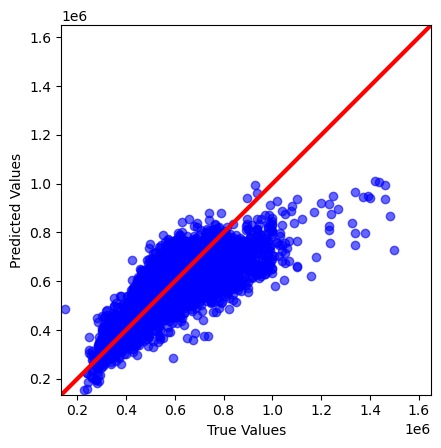

In [44]:
plot_truth_vs_predictions(y_hdb_test, y_hdb_pred)

The plot above tells us that our model perform particularly poorly when predicting the resale prices of expensive apartments. In these cases, our model severely underestimates the price, resulting in (very) large errors. The main reason for this is that the input features and the target output do no exhibit a strong , let alone perfect, linear relationship. Another likely reason are outliers, potentially caused by an erroneous data collection. For example, look at the blue data point on the very left, where the true price is around 100,000 dollars and the estimated prices is around 500,000 dollars.

However, a more detailed exploration is beyond the scope here. We also do not address the aspect of feature importance, that is, which of the five input features has the most impact on the prediction results. In a separate notebook, we provide a complete practical example for training and properly evaluating a Linear Regression model on a real-world dataset.

---

## Summary

Linear Regression is one of the simplest and most widely used techniques in statistics and machine learning. It models the relationship between one or more independent variables (features) and a dependent variable (target) by fitting a linear equation to the data. The goal is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the error between predicted and actual values. This error is often measured using metrics like Mean Squared Error (MSE).

Linear regression can be categorized into two types: Simple Linear Regression (with one independent variable) and Multiple Linear Regression (with multiple independent variables). The model assumes a linear relationship between the variables. Despite its simplicity, it is highly interpretable and can serve as a powerful baseline for regression problems in various fields, including finance, healthcare, and marketing. For data scientists, AI engineers, and machine learning students, understanding linear regression is critical because it provides the foundational principles behind more complex machine learning models.

In real-world applications, linear regression is not only used as a predictive tool but also for its interpretability. For example, it helps determine the strength and significance of relationships between variables, enabling actionable insights. This makes it invaluable in domains like economics and healthcare, where understanding the impact of individual variables is as important as making accurate predictions. Learning about linear regression also prepares students and professionals to understand advanced techniques, including polynomial regression, logistic regression, and generalized linear models. It serves as a stepping stone for mastering more sophisticated algorithms like neural networks, which often involve nonlinear transformations but retain similar optimization principles.

In summary, linear regression is fundamental to data science and machine learning. Its simplicity, interpretability, and utility across disciplines make it an essential topic for anyone aiming to build a strong foundation in these fields. By mastering linear regression, practitioners can better understand data, evaluate relationships, and prepare for more advanced modeling techniques.